In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering 
from scipy.spatial.distance import cdist

In [58]:
df=pd.read_csv('Data01.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [139]:
df.duplicated().sum()

0

In [59]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [83]:
X=df.iloc[ :, [2,3,4]]

In [87]:
y=df.iloc[ :, [1]]

In [88]:
y.head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female


In [89]:
df_cat=df.select_dtypes(include="object")
dummy_variables = pd.get_dummies(y, drop_first=True)
dummy_variables.head()

,Gender_Male
0,1
1,1
2,0
3,0
4,0


In [92]:
dummy_variables.dtypes

Gender_Male    uint8
dtype: object

In [93]:
df=pd.concat([X,dummy_variables],axis=1)

In [94]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [109]:
kmeans = KMeans(n_clusters=3,random_state=101)

In [110]:
kmeans.fit(df)

KMeans(n_clusters=3, random_state=101)

In [112]:
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df))
centroid_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,32.692308,86.538462,82.128205,0.461538
1,40.325203,44.154472,49.829268,0.406504
2,40.394737,87.000000,18.631579,0.526316


In [113]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['cluster_number']))
df_labels['cluster_number'] = df_labels['cluster_number'].astype('category')

In [114]:
X_cluster = X.join(df_labels)
X_cluster.head()

,Age,Annual Income (k$),Spending Score (1-100),cluster_number
0,19,15,39,1
1,21,15,81,1
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1


In [116]:
X_cluster.cluster_number.value_counts()

1    123
0     39
2     38
Name: cluster_number, dtype: int64

In [117]:
X_cluster[X_cluster.cluster_number==1]

,Age,Annual Income (k$),Spending Score (1-100),cluster_number
0,19,15,39,1
1,21,15,81,1
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1
...,...,...,...,...
118,51,67,43,1
119,50,67,57,1
120,27,67,56,1
121,38,67,40,1


In [123]:
Z = linkage(df, method='ward')
c, coph_dists = cophenet(Z , pdist(df))
c

0.66837812145403

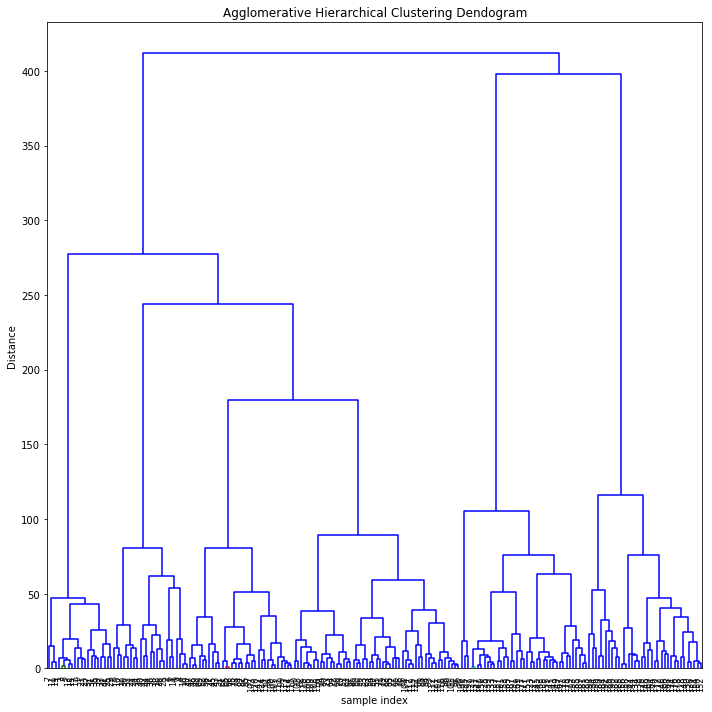

In [124]:
#Plot dendogram
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., color_threshold=2, leaf_font_size=8. )
plt.tight_layout()

In [127]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')

In [128]:
model.fit(df)

AgglomerativeClustering(n_clusters=3)

In [130]:
df['cluster_labels'] = model.labels_
df['cluster_labels'].value_counts()

0    126
2     39
1     35
Name: cluster_labels, dtype: int64

In [136]:
K = range(1, 10)
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(df)
 
    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(df, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df.shape[0]
    mapping2[k] = kmeanModel.inertia_

1 : 35.59778957379353
2 : 30.13274160251189
3 : 24.02078508848272
4 : 20.479857161798513
5 : 17.77895659142966
6 : 15.448663692811202
7 : 14.562860114893997
8 : 13.85051322464546
9 : 13.117495335275123


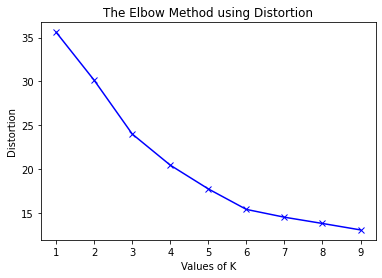

In [137]:
for key, val in mapping1.items():
    print(f'{key} : {val}')
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

Best K-value=3